In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
#import pytesseract
#pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [2]:
def plot_meas(img):
    plt.figure(figsize = (20,16))
    plt.imshow(img)

In [3]:
# build up training data
'''

dir = './image_dir'
files


'''

"\n\ndir = './image_dir'\nfiles\n\n\n"

In [4]:
#dirs = {0:'TEM-2015-02-13',1:'TEM-2015'}

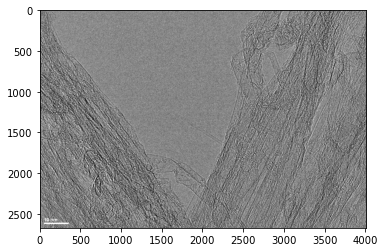

In [5]:
img = mpimg.imread('../cnt_data/TEM-2018-01-05/LX0104R1-FMES120-120kV/02.jpg')
plt.imshow(img)

In [5]:
dir_path = 'C:/Users/Max/OneDrive/git_repos/cnt_data/TEM-2018-01-05/LX0104R1-FMES120-120kV/'
f_list = glob.glob(dir_path+'*.jpg')

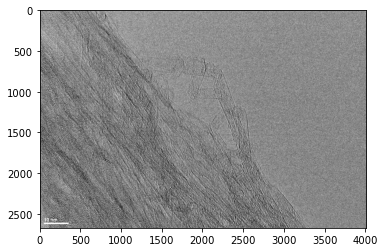

In [6]:
img = mpimg.imread(f_list[0])
plt.imshow(img);

### Get ROIs from labeled image

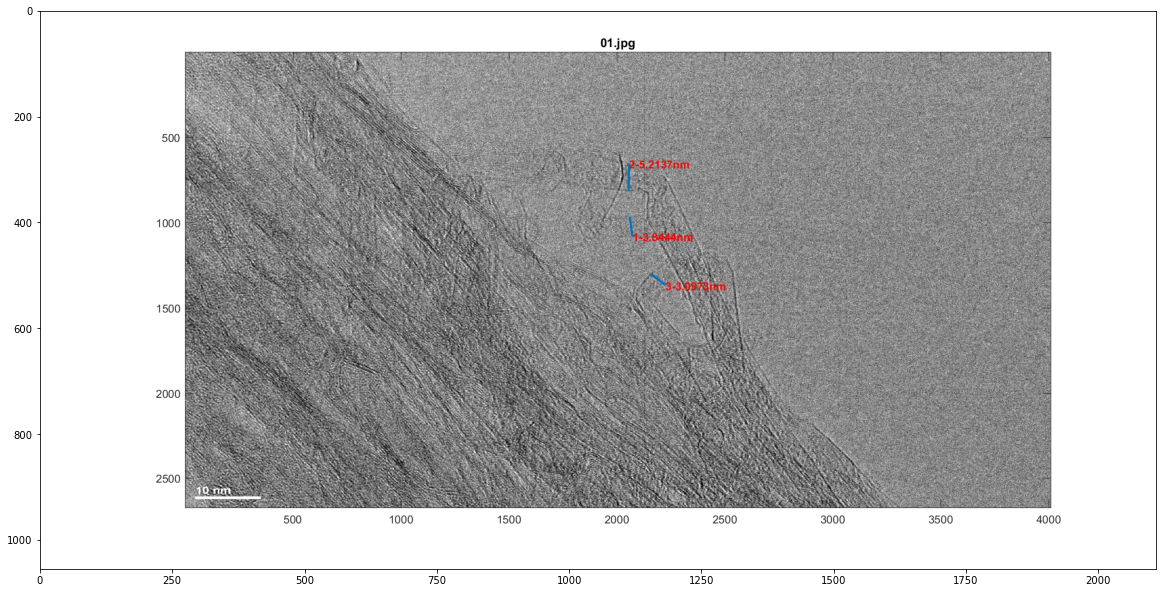

In [3]:
img = mpimg.imread('../cnt_data/TEM-2018-01-05/LX0104R1-FMES120-120kV/Measurments/meas1.tif') / 255
plot_meas(img)

In [182]:
def get_text(img):
    text_img = np.zeros(img.shape)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            text_img[y,x,:] = img[y,x,:] - img[y,x,2] #subtract blue channel from each channel
    return text_img.clip(min=0,max=1)
'''
def get_lines_old(img):
    text_img = np.zeros(img.shape)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            text_img[y,x,:] = img[y,x,:] - np.mean(img[y,x,:]) #subtract mean of each channel from each channel
            text_img[y,x,0:2] = [0,0] # set R and G channels to 0
    return text_img.clip(min=0,max=1)
'''
def get_lines(img):
    
    img_r = img[:,:,0] - img[:,:,0]
    img_g = img[:,:,1] - img[:,:,0]
    img_b = img[:,:,2] - img[:,:,0]
    
    return np.clip(np.dstack((img_r,img_g,img_b)),a_min = 0,a_max = 1)

def get_lines_BGR(img):
    
    img_r = img[:,:,0] - img[:,:,2]
    img_g = img[:,:,1] - img[:,:,2]
    img_b = img[:,:,2] - img[:,:,2]
    
    return np.clip(np.dstack((img_r,img_g,img_b)),a_min = 0,a_max = 1)

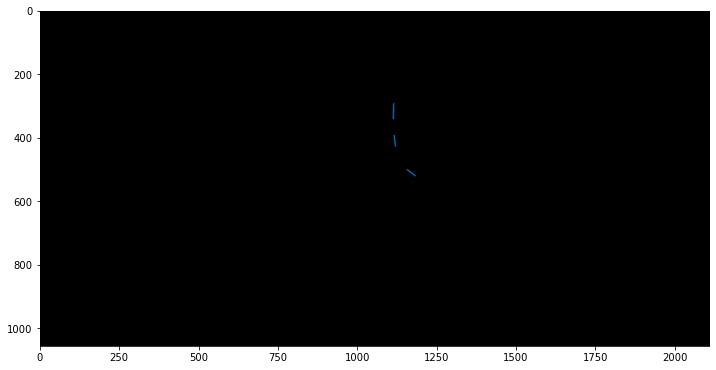

In [172]:
img = mpimg.imread('../cnt_data/TEM-2018-01-05/LX0104R1-FMES120-120kV/Measurments/meas1.tif')/255

text_img = get_lines(img)

plt.figure(figsize = (12,20))
plt.imshow(text_img,vmax = 0.0001)

In [53]:
img.max()

255

In [34]:
type(segs)

cv2.LineSegmentDetector

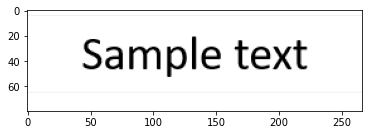

In [28]:
sample_text_img = mpimg.imread('text_image_sample.png')
plt.imshow(sample_text_img)

In [29]:
sample_text_img *= 255
sample_text_img = text_img.astype(np.uint8)

In [81]:
text_1 = text_1.sum(axis = 2)
type(text_1)

numpy.ndarray

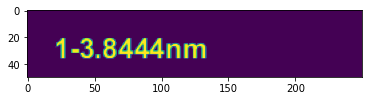

In [82]:
plt.imshow(text_1 * 255)

In [83]:
text_1 = 255 * text_1.astype(np.uint8)

In [84]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
print(pytesseract.image_to_string(text_1))

RCC)



In [74]:
labels = (pytesseract.image_to_string(text_img))

In [77]:
labels.split('\n')

['2-5.2137nm', '', 'RCC)', '', '3-3.0973nm', '\x0c']

In [67]:
# https://stackoverflow.com/questions/45322630/how-to-detect-lines-in-opencv

# get coordinates from lines
text_img = get_text(img)
gray = cv2.cvtColor(text_img,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

error: OpenCV(4.4.0) c:\users\appveyor\appdata\local\temp\1\pip-req-build-2b5g8ysb\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xf162147f::Set<1,-1,-1>,struct cv::impl::A0xf162147f::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [ ]:
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

In [48]:
#lines = lines[:,:,2]
lines = (255*lines).astype(np.uint8)

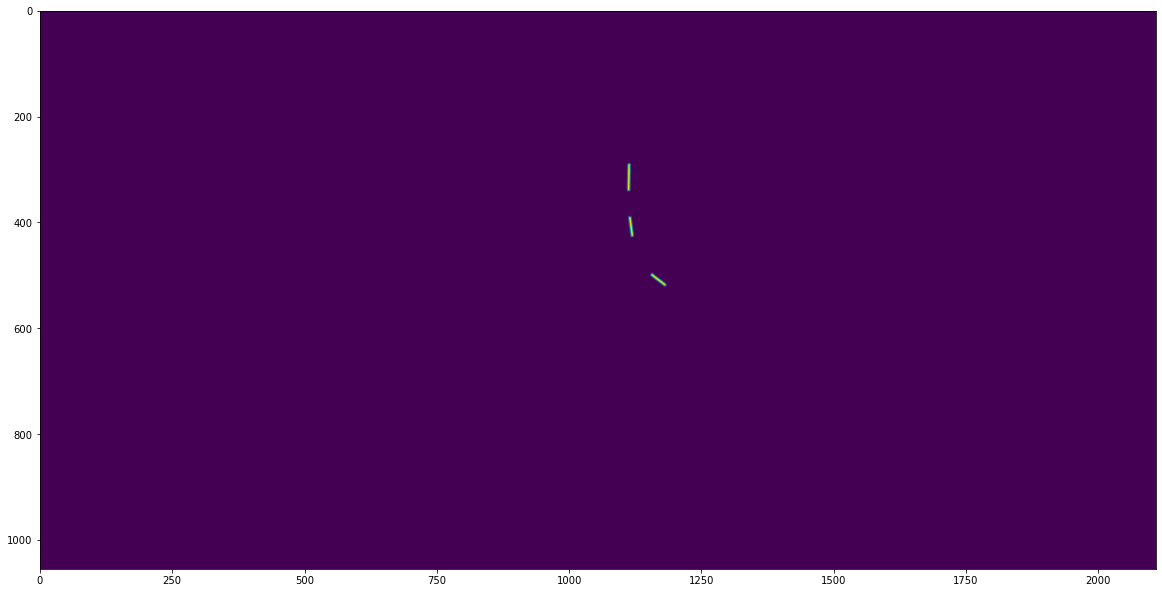

In [65]:
img = text_img #cv2.imread('../cnt_data/TEM-2018-01-05/LX0104R1-FMES120-120kV/Measurments/meas1.tif')

#line_img = get_lines(img)
#img = lines

blue_lines = (255* img).astype(np.uint8)
gray = cv2.cvtColor(blue_lines,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

plot_meas(blur_gray)

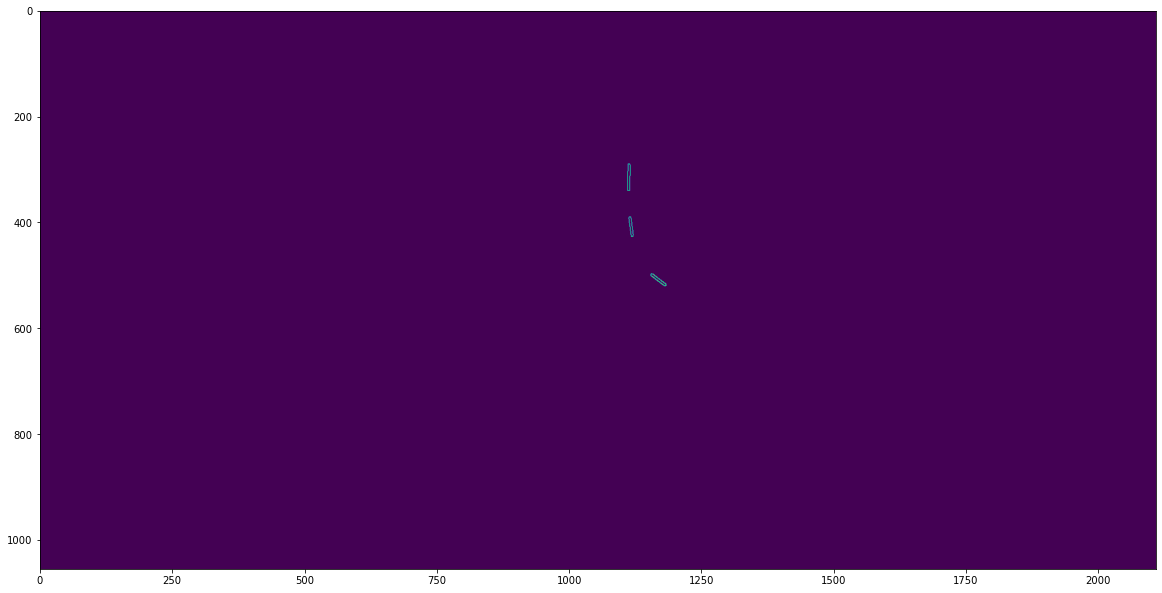

In [62]:
low_threshold = 150
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

plot_meas(edges)


In [68]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)



'''
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
''';

In [64]:
type(lines)

NoneType

In [28]:
lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)

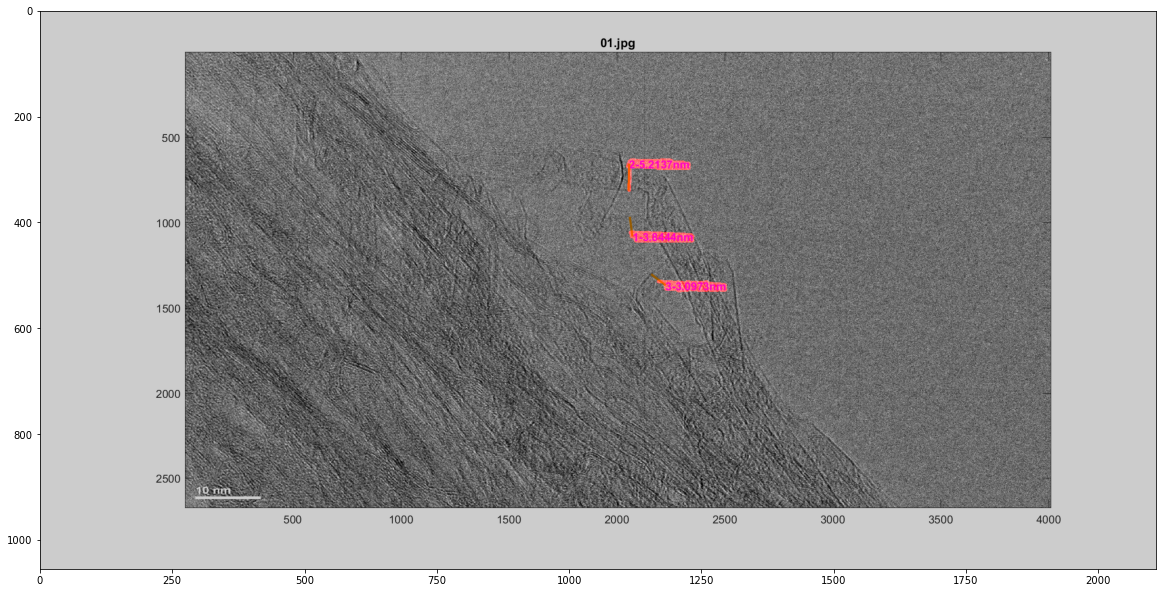

In [137]:
plot_meas(lines_edges)

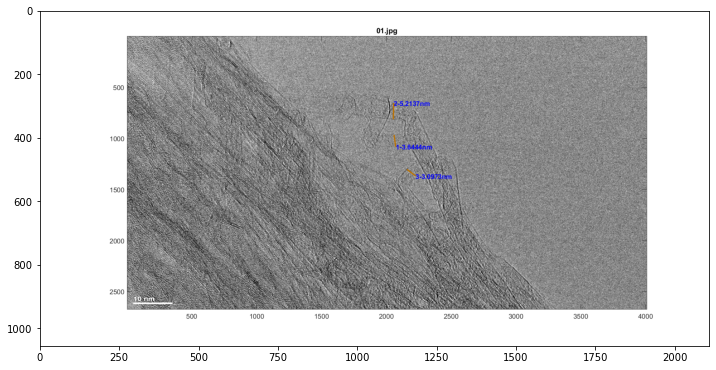

In [188]:
img = cv2.imread('../cnt_data/TEM-2018-01-05/LX0104R1-FMES120-120kV/Measurments/meas1.tif')

text_img = get_lines_BGR(img)

plt.figure(figsize = (12,20))
plt.imshow(img,vmax = 0.0001)

TypeError: 'NoneType' object is not iterable

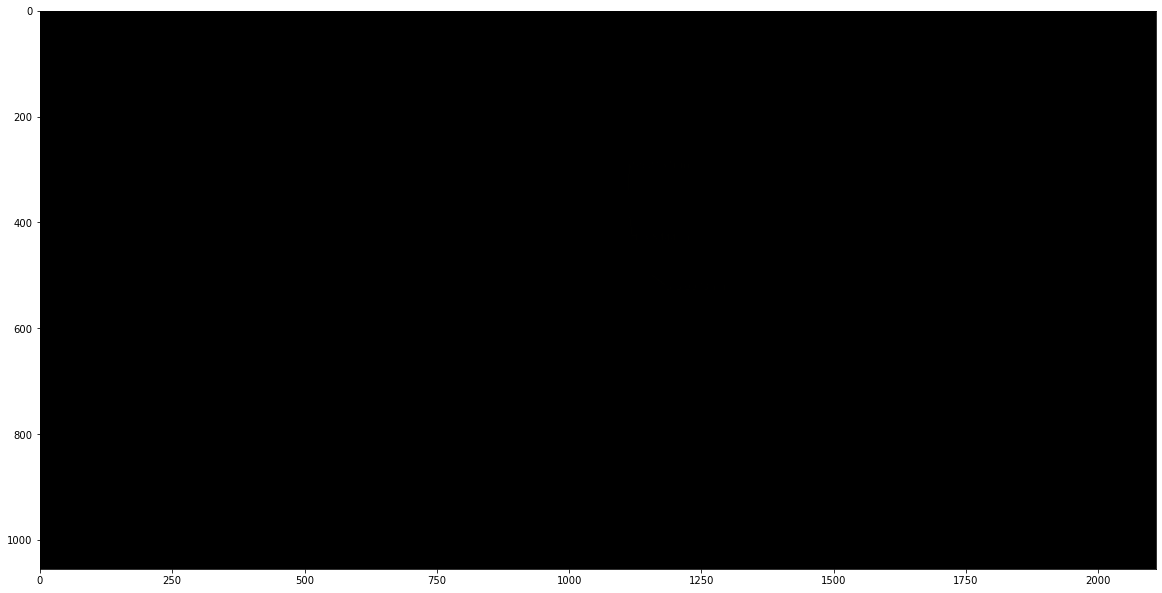

In [183]:
img = cv2.imread('../cnt_data/TEM-2018-01-05/LX0104R1-FMES120-120kV/Measurments/meas1.tif')

#img = mpimg.imread('../cnt_data/TEM-2018-01-05/LX0104R1-FMES120-120kV/Measurments/meas1.tif')

blue_lines = get_lines_BGR(img)

plot_meas(blue_lines)

#img = (255*text_img).astype(np.uint8)
gray = cv2.cvtColor(blue_lines,cv2.COLOR_RGB2GRAY)

kernel_size = 11
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

edges = cv2.Canny(blur_gray,50,150,apertureSize = 3)


rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 10  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = img  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
for line in lines: 
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),1)
        
'''        
plt.figure(figsize = (20,20))
plt.imshow(data)
for line in lines:
    for x1,y1,x2,y2 in line:
        plt.plot((x1,y1),(x2,y2))
    #x1,y1,x2,y2 = line[0]
    #plt.plot([x1,y1],[x2,y2])
'''   
#plt.xlim(1000,1300)
#plt.ylim(600,200)
print(len(lines))

In [145]:
lines

array([[[1115,  332, 1115,  291]],

       [[1110,  340, 1110,  293]],

       [[1154,  501, 1180,  520]],

       [[1117,  391, 1121,  425]],

       [[1112,  391, 1117,  427]],

       [[1159,  498, 1182,  516]],

       [[1157,  497, 1182,  517]],

       [[1112,  393, 1113,  405]]], dtype=int32)

In [ ]:
def line_grouper(ungrouped_lines):
    
    for 

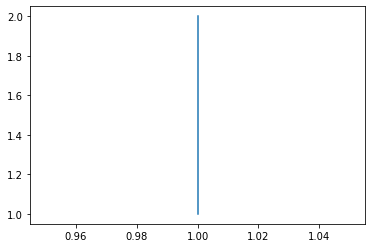

In [111]:
plt.plot([1,1],[2,1])

[]

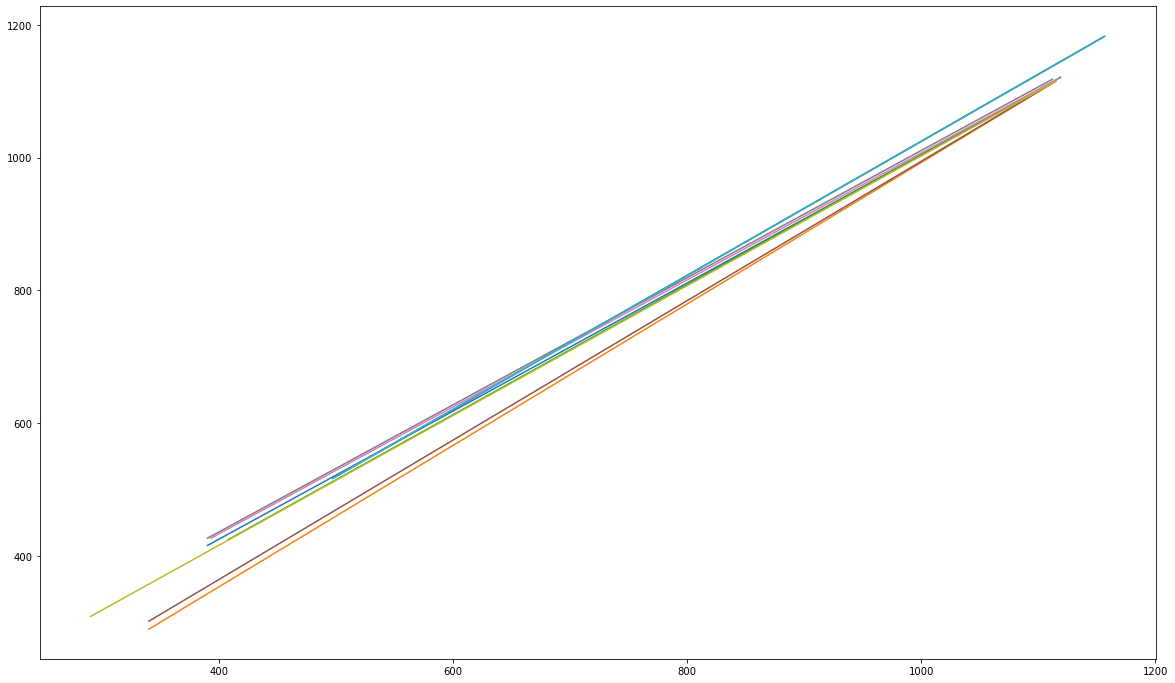

In [108]:
plt.figure(figsize = (20,12))

for line in lines:
    
    x1,y1,x2,y2 = line[0]
    plt.plot([x1,y1],[x2,y2])

plt.plot()


In [98]:
lines

array([[[1115,  390, 1115,  416]],

       [[1114,  340, 1114,  290]],

       [[1119,  408, 1121,  425]],

       [[1156,  497, 1182,  517]],

       [[1154,  500, 1180,  520]],

       [[1110,  340, 1110,  302]],

       [[1117,  393, 1119,  427]],

       [[1112,  390, 1118,  427]],

       [[1115,  290, 1115,  309]],

       [[1157,  497, 1183,  517]]], dtype=int32)

In [76]:
(255*text_img).astype(np.uint8)

189

In [87]:
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

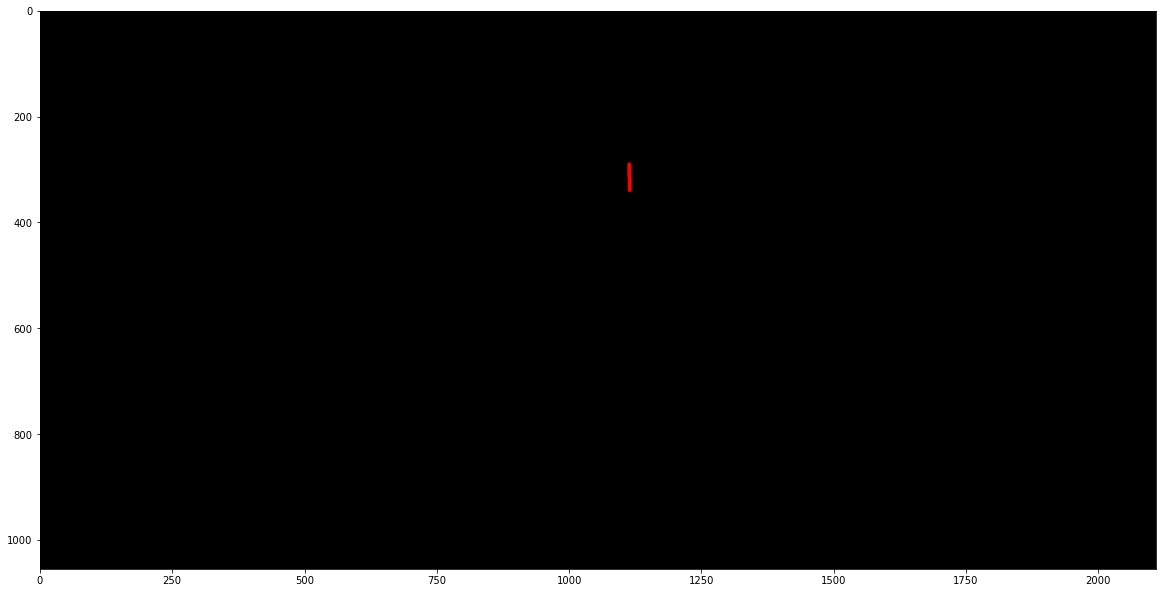

In [88]:
plot_meas(line_image)

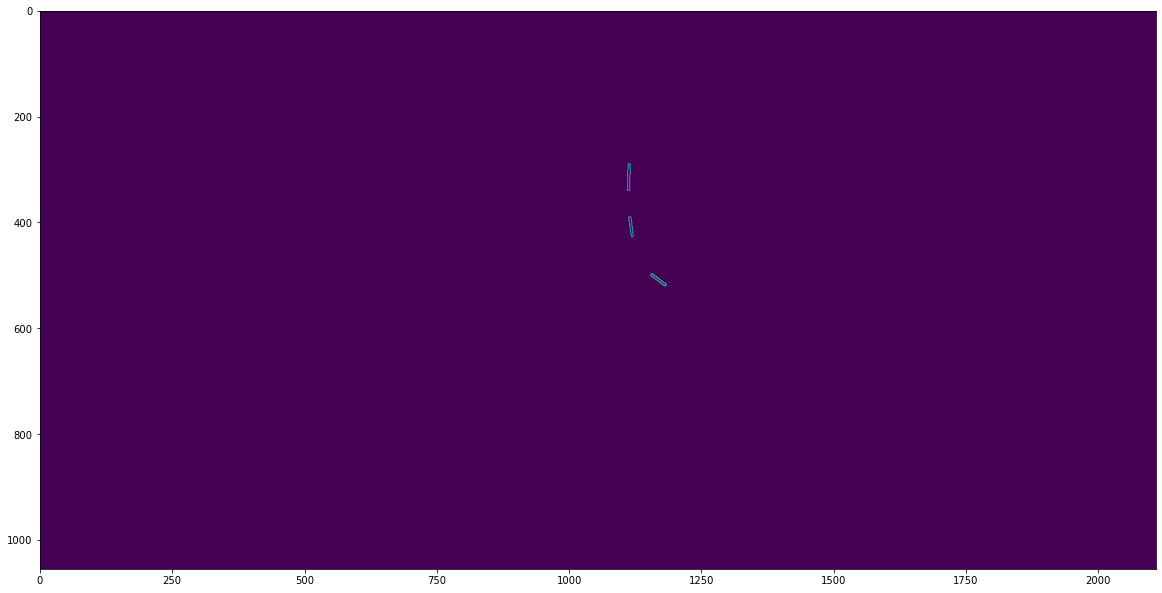

In [81]:
plot_meas(edges)